In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from scipy.stats import ks_2samp, chi2_contingency
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import warnings

In [21]:
warnings.filterwarnings("ignore")   # 파이썬에서 경고 메시지를 무시하도록 설정함

In [22]:
# 마운트 작업이 필요하다.
from google.colab import  drive
# drive.mount("/content/drive/")
df = pd.read_csv("/content/drive/MyDrive/새싹 교육 과정/코랩/data/uci-secom.csv")

df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [23]:
len(df.columns)  # 특성의 개수

592

In [24]:
# 데이터 개수
len(df)

1567

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [26]:
df.describe()   # 기본 통계량
# count 값이 다르다. 결측치가 있다.

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [27]:
df.isnull().sum()   # 결측치 개수

,0
Time,0
0,6
1,7
2,14
3,14
...,...
586,1
587,1
588,1
589,1


In [28]:
# 각 컬럼별로 결측치 확인해보기
print(df['0'].isnull().sum())
print(df['1'].isnull().sum())
print(df['2'].isnull().sum())
print(df['3'].isnull().sum())

6
7
14
14


In [29]:
from re import X
# 데이터를 종속변수와 독립변수로 나눠보자
# 종속변수는 ['Pass/Fail'], 나머지는 독립변수
X = df.drop(['Pass/Fail'],axis=1)   # 열 제거하고 나머지를 받는다.
y = df['Pass/Fail']     # 종속변수만 잘라서 y로 보냄

print(X)
print(y)
if np.any(y==-1):
    y = y.replace({-1: 0})
print(y)

                     Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...     580       581     582     58

In [30]:
# 결측치 -> 퍼센티지(삭제? 대체를 할 건가)
total_count = len(df)
null_percentage = X.isnull().sum() / total_count * 100
print(null_percentage)
print(max(null_percentage))

Time    0.000000
0       0.382897
1       0.446713
2       0.893427
3       0.893427
          ...   
585     0.063816
586     0.063816
587     0.063816
588     0.063816
589     0.063816
Length: 591, dtype: float64
91.19336311423102


In [31]:
# 20% 넘어가는 필드를 삭제 해보자
threshold = len(X) * 0.20
print(threshold)

X = X.dropna(axis=1, thresh=threshold)  # 최소 전체 데이터중에서 20%이상은 정상적인 값이 있어ㅑㅇ 한다.
# 나머지는 열 자체를 삭제하자
# thresh - 최소한도로 특정필드가 적어도 20%는 있어야 삭제 안 한다.
print(X.shape)

313.40000000000003
(1567, 583)


In [32]:
# 필요 없는 열, 시계열 자료가 아니라면 굳이 Time 필드가 필요하지 않다.
X = X.drop(columns= ['Time'])
print(X.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '580', '581', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=582)


In [33]:
# 나머지 필드들 중에서 NaN값을 갖고 있는 많은 필드가 있다.
# 이걸 대체값(평균값, 중간값), 분류(최빈값)으로 대체하자.
means = X.mean()    # 모든 열에 대한 평균값을 가져온다.
print(means)

# NaN값을 특정값으로 대체한다.
X = X.fillna(means)
print("전체 결측치 개수:", X.isnull().sum().sum())  # 전체 합계를 0으로 만들다.
# isnull True 또는 False로 리스트를 가져옴.
# sum 함수는 True를 1로 판단하고 False를 0으로 판단
# 개수를 센다. 필드 개수, 필드 개수

0      3014.452896
1      2495.850231
2      2200.547318
3      1396.376627
4         4.197013
          ...     
585       3.067826
586       0.021458
587       0.016475
588       0.005283
589      99.670066
Length: 582, dtype: float64
전체 결측치 개수: 0


In [34]:
# 중복데이터 제거
duplicated_rows = X.duplicated()    # 전체 필드가 동일한 경우
print(duplicated_rows.sum())

0


In [35]:
# 분산확인 - 분산이 0이면 분석필요가 없음
var = X.var()
print(var[var==0].sum())
# 현재 남아있는 특성의 개수가 582개임, 산포도 불가능, 시본의 pairplot도 못 그린다.
# 산포도를 대체할 수 있는 차트 그냥 2개씩 찝어서 히스토그램 => 281개의 차트가 필요 X
# 히트맵을 그려보자
# 상관계수를 구하자
correlation_matrix = X.corr()
print(correlation_matrix)

0.0
            0         1         2         3         4   5         6         7  \
0    1.000000 -0.143840  0.004756 -0.007613 -0.011014 NaN  0.002270  0.031483   
1   -0.143840  1.000000  0.005767 -0.007568 -0.001636 NaN -0.025564 -0.012037   
2    0.004756  0.005767  1.000000  0.298935  0.095891 NaN -0.136225 -0.146213   
3   -0.007613 -0.007568  0.298935  1.000000 -0.058483 NaN -0.685835  0.073856   
4   -0.011014 -0.001636  0.095891 -0.058483  1.000000 NaN -0.074368 -0.347734   
..        ...       ...       ...       ...       ...  ..       ...       ...   
585  0.023589  0.002273  0.015752  0.026019 -0.001616 NaN -0.039517  0.010337   
586  0.018443 -0.009403 -0.025495  0.034711 -0.043929 NaN -0.041209  0.058113   
587 -0.025880  0.017266 -0.029345 -0.039132 -0.031005 NaN  0.034027 -0.021426   
588 -0.028166  0.010118 -0.030818 -0.033645 -0.026100 NaN  0.032227 -0.020893   
589  0.004174  0.044797 -0.032890 -0.080341  0.050910 NaN  0.043777 -0.107804   

            8         9

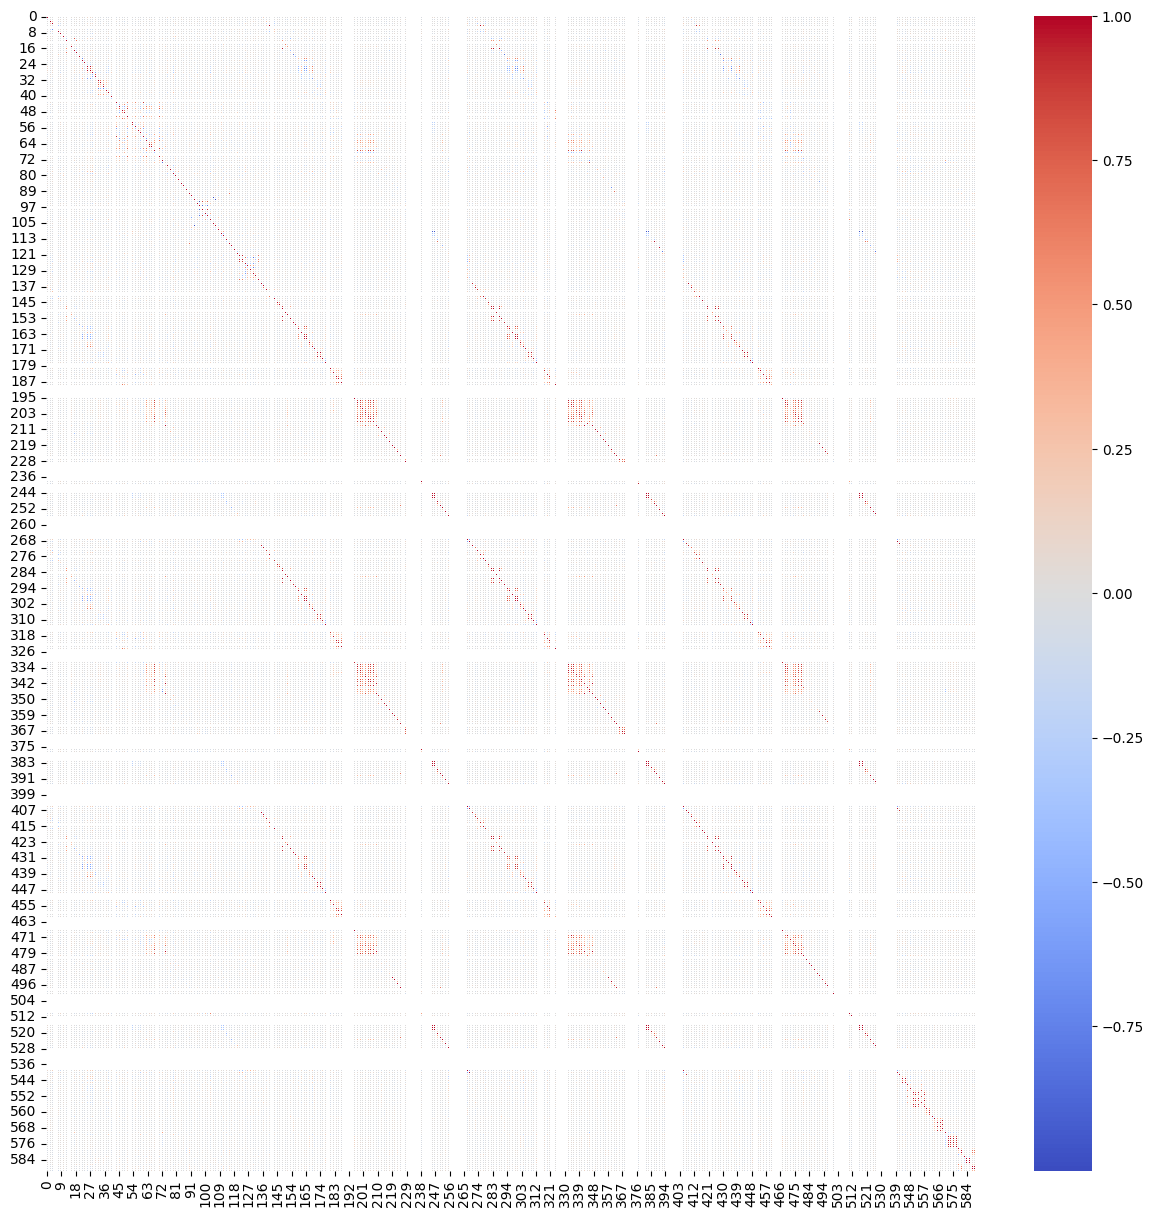

In [36]:
# 차트를 그려보자(히트맵)
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.1f',
            linewidths=0.5)
plt.show()

In [40]:
# 상관계수값이 너무 낮으면 제거해야 한다.
# 0.05보다 낮은 것들
XX = X
XX['Pass/Fail'] = y
print(XX.shape)

correlations = XX.corr()['Pass/Fail'].abs()
print(correlations)

# 기준점 잡기
threshold = 0.05
result_index = correlations[correlations >= threshold].index
print(len(result_index))

XX = XX[result_index]   # 너무 낮은 상관계수를 갖는 특성은 제거하자.
print(XX.shape)

(1567, 583)
0            0.025141
1            0.002603
2            0.000957
3            0.024623
4            0.013756
               ...   
586          0.004156
587          0.035391
588          0.031167
589          0.002653
Pass/Fail    1.000000
Name: Pass/Fail, Length: 583, dtype: float64
87
(1567, 87)


In [50]:
# 다중공선성 -> R언어는 제공한다.
# 각 속성 간에 너무 높은 관계성으로 인해서 제거해야할 속성이 있다.
# 두 개 이상의 특성이 상관관계가 너무 높을 때 이를 다중공선성이라고 한다.
# A -> B -> C -> D(마지막 목적지가 D라고 할 때)
# A, B, C나 사실상 같은 것. 나머지 특성을 제거해야 한다.
# 87 개의 특성에서 다중공선성문제를 해결하자
correlation_matrix = XX.corr()
print(correlation_matrix.shape)

# 타겟과 다른 feature 간의 상관관계를 계산해보자
# 상관계수 행렬은 각 특성들 간의 상관관계를 보여준다.
# 그리고 Target은 언제나 1이다.
# Pass/Fail을 제거한 다음에
target_correction = correlation_matrix['Pass/Fail'].drop('Pass/Fail')
print(correlation_matrix)

threshold = 0.8
# 상관계수의 임계점을 설정하자 서로간에 0.8 이상의 상관계수를 갖는 특성들을 중복으로 간주한다.
highly_correlated_features = set()  # 중복성을 제거하기 위해서 set타입을 사용한다.
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)
            # highly_correlated_features.add((colname_i, colname_j))

# 보존할 특성을 선택한다. - 다중공선성이 있는 특성들 중에서 하나만 고른다.
# 최대의 상관관계를 갖고 있는 특성을 가져온다.
features_to_keep = []
if not target_correction.empty:
    max_corr_feature = target_correction.idxmax()   # 해당 특성에서 가장 높은 상관관계를 찾는다.
    for feature in highly_correlated_features:      # 최대값과 같은 특성을 찾아서 저장한다.
        if feature == max_corr_feature:
            features_to_keep.append(max_corr_feature)

print(highly_correlated_features)
print("#######################################################3")
print(features_to_keep)

# 다중공선성이 높은 것들끼리 비교해서 중복되는 거 버리고,
# 상관계수가 낮은 것의 정보를 보관
non_correlated_features = set(XX.columns) - set(highly_correlated_features)
features_to_keep.extend(non_correlated_features)
print(features_to_keep)

# 중복배제
features_to_keep = list(set(features_to_keep))
print(len(features_to_keep))    # 36개 필드 features_to_keep: 사용해야할 특성에 대한 정보

X = XX[features_to_keep]
print(X.shape)




(87, 87)
                 14        21        22        26        28        32  \
14         1.000000 -0.034719 -0.013903 -0.032961  0.026214 -0.011179   
21        -0.034719  1.000000 -0.725921 -0.404127  0.006597 -0.035367   
22        -0.013903 -0.725921  1.000000  0.531019 -0.065717  0.069783   
26        -0.032961 -0.404127  0.531019  1.000000  0.187429  0.039817   
28         0.026214  0.006597 -0.065717  0.187429  1.000000 -0.104971   
...             ...       ...       ...       ...       ...       ...   
554       -0.017936 -0.004881  0.008854  0.015310 -0.070103  0.005531   
557       -0.018244 -0.002648  0.004026  0.023416 -0.054318  0.005455   
573        0.014069  0.031203 -0.006662  0.012845  0.040436 -0.003927   
575        0.013565  0.020319  0.000640  0.011298  0.031176 -0.011848   
Pass/Fail -0.068975  0.107997 -0.073380 -0.081146 -0.106767  0.052132   

                 33        38        40        56  ...       511       519  \
14        -0.011368 -0.070297 -0.016

(35, 35)


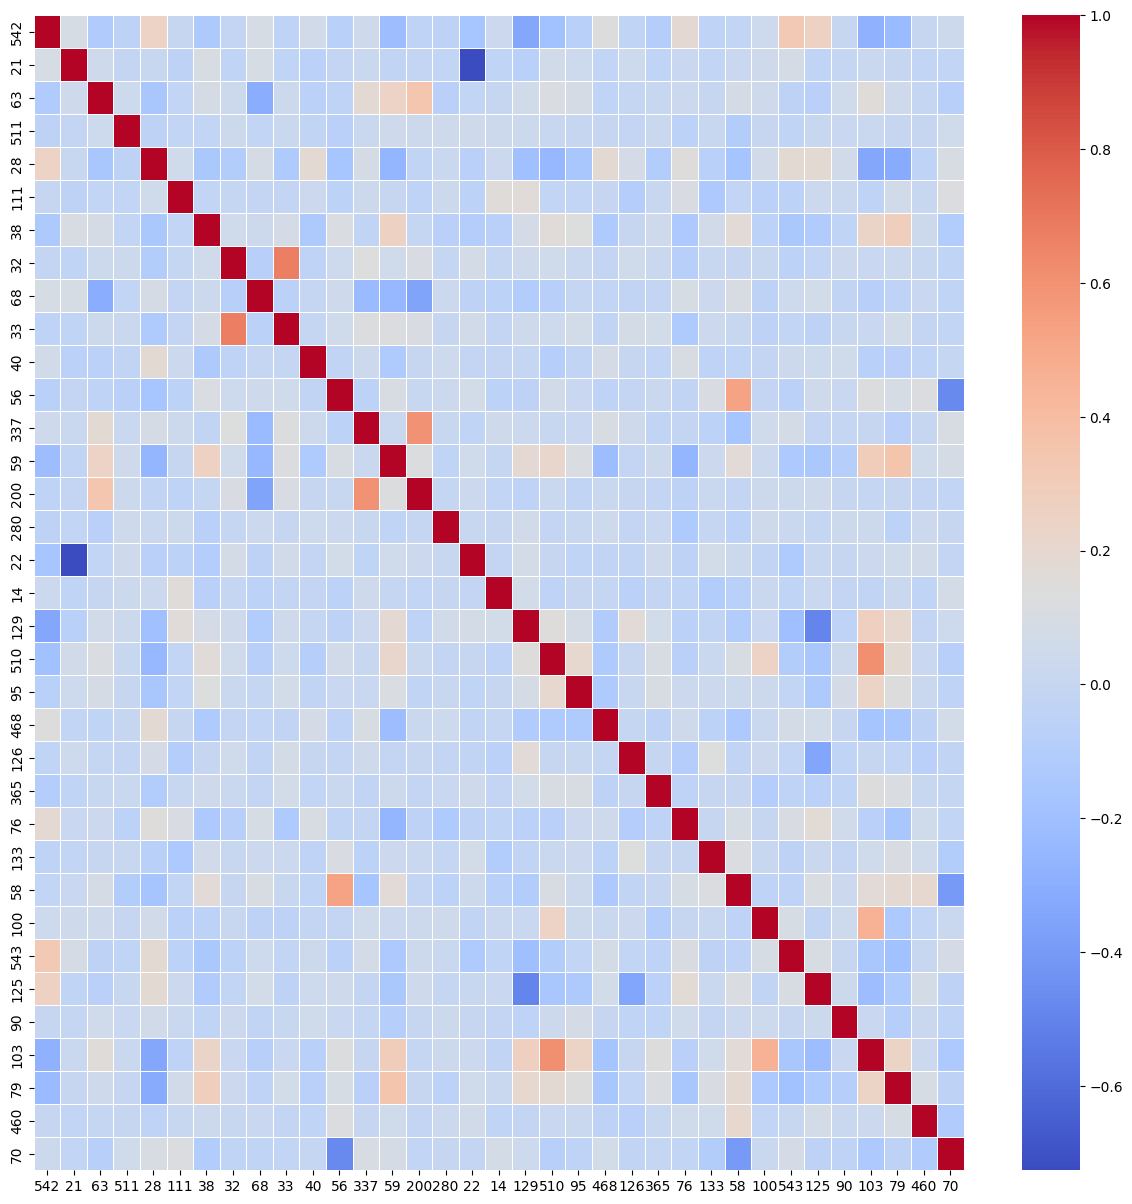

In [54]:
# 차트를 그려보자(히트맵)
X = X.drop(columns=['Pass/Fail'])
correlation_matrix = X.corr()
print(correlation_matrix.shape)

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.1f',
            linewidths=0.5)
plt.show()

In [38]:
# 훈련셋과 테스트셋으로 나눈다.
X_train, X_test, y_train, y_test =  train_test_split(
    X, y,
    random_state=1,
    test_size=0.2
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1253, 583)
(1253,)
(314, 583)
(314,)
